## Cars, oil, and ice cream

In [30]:
import pandas as pd
import numpy as np

In [31]:
oil = pd.read_csv('../data/wti-daily.csv',
                 parse_dates= [0],
                 header= 0,
                 index_col=0,
                 names = ['date', 'oil'])
oil.head()

oil
date             
1986-01-02  25.56
1986-01-03  26.00
1986-01-06  26.53
1986-01-07  25.85
1986-01-08  25.87

In [32]:
iceCream = pd.read_csv( '../data/ice-cream.csv', 
                       parse_dates=[0], 
                       index_col=0, 
                       header=0,
                       names=['date','icecream'])
iceCream.head()

icecream
date               
1980-01-01    1.755
1980-02-01    1.775
1980-03-01    1.718
1980-04-01    1.769
1980-05-01    1.822

In [33]:
try:
    iceCream['icecream'] = iceCream['icecream'].astype(np.float64)

except ValueError as e:
    print(f"you got an error {e}")
    



you got an error could not convert string to float: '.'


In [34]:
iceCream = iceCream.loc[iceCream['icecream'].str.contains(r'\d', regex=True)].astype(np.float64)

In [35]:
miles = pd.read_csv('../data/miles-traveled.csv',
                       parse_dates=[0],
                       index_col=0,
                       header=0,
                       names=['date', 'miles'])
miles.head()

miles
date               
1970-01-01  80173.0
1970-02-01  77442.0
1970-03-01  90223.0
1970-04-01  89956.0
1970-05-01  97972.0

In [36]:
df = oil.join(iceCream).join(miles)
df

oil  icecream  miles
date                              
1986-01-02  25.56       NaN    NaN
1986-01-03  26.00       NaN    NaN
1986-01-06  26.53       NaN    NaN
1986-01-07  25.85       NaN    NaN
1986-01-08  25.87       NaN    NaN
...           ...       ...    ...
2021-12-14  70.57       NaN    NaN
2021-12-15  70.89       NaN    NaN
2021-12-16  72.34       NaN    NaN
2021-12-17  70.93       NaN    NaN
2021-12-20  68.69       NaN    NaN

[9064 rows x 3 columns]

In [37]:
df = oil.join(iceCream).join(miles).dropna()
df

oil  icecream     miles
date                                 
1986-04-01  11.13     2.382  150277.0
1986-05-01  13.80     2.368  160459.0
1986-07-01  12.39     2.369  171114.0
1986-08-01  11.56     2.319  173977.0
1986-10-01  15.23     2.377  159434.0
...           ...       ...       ...
2021-07-01  75.33     4.943  296475.0
2021-09-01  68.63     4.900  277979.0
2021-10-01  76.01     4.952  285760.0
2021-11-01  84.08     4.770  267647.0
2021-12-01  65.44     4.766  268398.0

[275 rows x 3 columns]

In [38]:
df = oil.join(iceCream, how='inner').join(miles, how='inner')
df

oil  icecream     miles
date                                 
1986-04-01  11.13     2.382  150277.0
1986-05-01  13.80     2.368  160459.0
1986-07-01  12.39     2.369  171114.0
1986-08-01  11.56     2.319  173977.0
1986-10-01  15.23     2.377  159434.0
...           ...       ...       ...
2021-07-01  75.33     4.943  296475.0
2021-09-01  68.63     4.900  277979.0
2021-10-01  76.01     4.952  285760.0
2021-11-01  84.08     4.770  267647.0
2021-12-01  65.44     4.766  268398.0

[275 rows x 3 columns]

In [39]:
df.corr()

oil  icecream     miles
oil       1.000000  0.777347  0.645250
icecream  0.777347  1.000000  0.818383
miles     0.645250  0.818383  1.000000

<Axes: xlabel='oil', ylabel='icecream'>

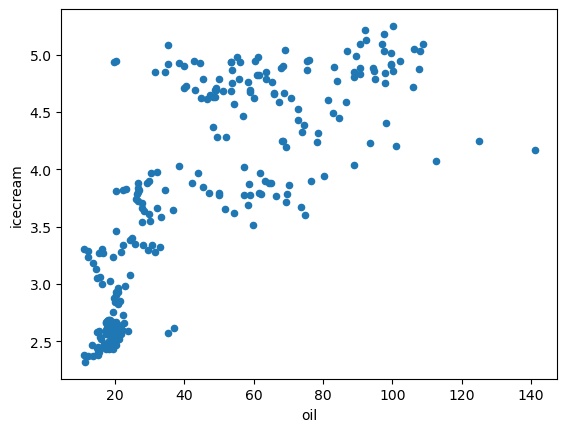

In [40]:
df.plot.scatter(x='oil', y='icecream')

<Axes: xlabel='oil', ylabel='miles'>

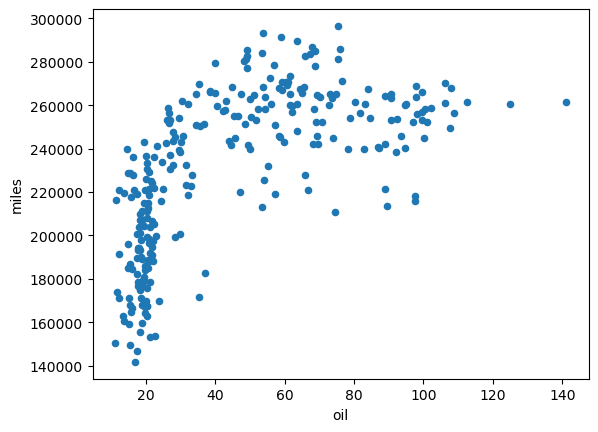

In [41]:
df.plot.scatter(x='oil', y='miles')

array([[<Axes: xlabel='oil', ylabel='oil'>,
        <Axes: xlabel='icecream', ylabel='oil'>,
        <Axes: xlabel='miles', ylabel='oil'>],
       [<Axes: xlabel='oil', ylabel='icecream'>,
        <Axes: xlabel='icecream', ylabel='icecream'>,
        <Axes: xlabel='miles', ylabel='icecream'>],
       [<Axes: xlabel='oil', ylabel='miles'>,
        <Axes: xlabel='icecream', ylabel='miles'>,
        <Axes: xlabel='miles', ylabel='miles'>]], dtype=object)

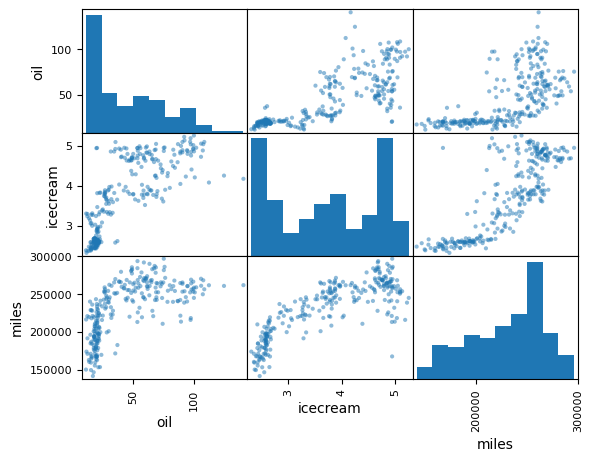

In [42]:
from pandas.plotting import scatter_matrix
scatter_matrix(df)

In [43]:
df = df.reset_index()
df['month'] = df['date'].dt.month
df = df.set_index('date')
df.corr()

oil  icecream     miles     month
oil       1.000000  0.777347  0.645250  0.006616
icecream  0.777347  1.000000  0.818383 -0.003985
miles     0.645250  0.818383  1.000000  0.079290
month     0.006616 -0.003985  0.079290  1.000000

<Axes: xlabel='icecream', ylabel='miles'>

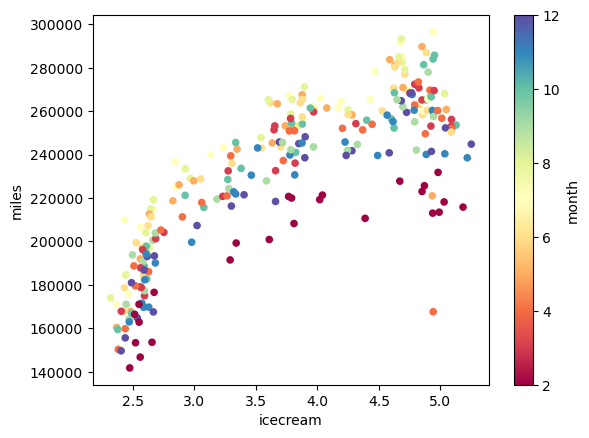

In [44]:
df.plot.scatter(x='icecream', y='miles', c='month', colormap='Spectral')


In [45]:
oil = oil.reset_index()
oil = oil[oil['date'].dt.is_month_start]
oil = oil.set_index('date')

df = oil.join(iceCream).join(miles)
df.head()

oil  icecream     miles
date                                 
1986-04-01  11.13     2.382  150277.0
1986-05-01  13.80     2.368  160459.0
1986-07-01  12.39     2.369  171114.0
1986-08-01  11.56     2.319  173977.0
1986-10-01  15.23     2.377  159434.0